## Objective

The aim of this notebook is to test the optimized functions on a set of small subgraphs

### Pre-requisites

In [1]:
import os
import sys

sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '../../')))

from utils.imports import *

Loading BokehJS ...

In [2]:
attributes_belgium = load_gtfs(str(PATH_TO_SQLITE))
L_graph_belgium = load_graph(L_SPACE_PATH)
subgraphs_belgium = load_all_subgraphs(DATA_DIR / "pkl", 5)

path_to_sqlite = BASE_DIR / "sqlite/NL.sqlite"
attributes_netherlands = load_gtfs(str(path_to_sqlite))
L_graph_netherlands = load_graph(DATA_DIR/"pkl/nl_merged.pkl")
subgraphs_netherlands = load_all_subgraphs(DATA_DIR / "pkl" / "netherlands", 5)

path_to_sqlite = BASE_DIR / "sqlite/ireland.sqlite"
attributes_ireland = load_gtfs(str(path_to_sqlite))
L_graph_ireland = load_graph(DATA_DIR/"pkl/ireland_cleaned.pkl")
subgraphs_ireland = load_all_subgraphs(DATA_DIR / "pkl" / "ireland", 5)

In [3]:
# simulate_fixed_node_removal_efficiency = compute_time(simulate_fixed_node_removal_efficiency) # time decorator
# run_removal_simulations = compute_time(run_removal_simulations)

### Make Subgraphs

In [5]:
# subgraphs = generate_subgraph_batches(L_graph, (10,15,20))
# subgraphs

In [6]:
# node_graphs = subgraphs[10]
# plot_graph(node_graphs[1], back_map="OSM") # Plotting the first graph

### Compute efficiency decline of subgraphs of same country

Original Efficiency: 0.0803
Step 1: Removed edges of 77 → Normalized Efficiency: 0.3260
Time taken: 1.4413 seconds

Step 2: Removed edges of 75 → Normalized Efficiency: 0.1183
Time taken: 0.5484 seconds

Step 3: Removed edges of 78 → Normalized Efficiency: 0.0491
Time taken: 0.1690 seconds

Step 4: Removed edges of 234 → Normalized Efficiency: 0.0075
Time taken: 0.0487 seconds

Function 'simulate_fixed_node_removal_efficiency' completed.
Execution time: 2.45 seconds



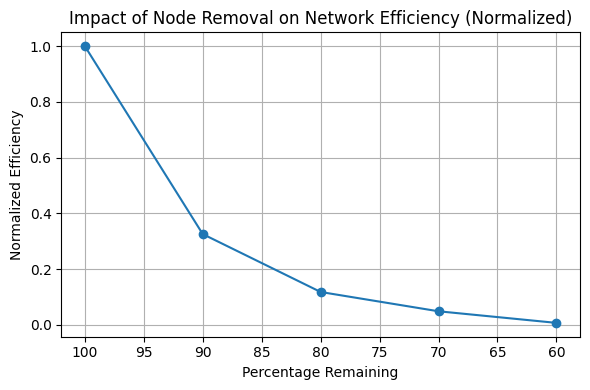

In [8]:
sp_func = make_sp_func(attributes_belgium, get_all_GTC_v4, P_space_v4)

original_efficiency, efficiencies, num_removed, removed_nodes, removal_times = \
    simulate_fixed_node_removal_efficiency(
        L_graph=subgraphs[10][1],
        sp_func=sp_func,
        num_to_remove=5,
        pct_to_remove=40,
        method='targeted',
        seed=42,
        verbose=True
    )

# Plot results
plot_efficiency_results(num_removed, efficiencies)

In [8]:
results_random = run_removal_simulations(
    subgraphs, 
    num_to_remove=5, 
    pct_to_remove=40, # priority over num_to_remove
    method='random', # random or targeted or betweenness
    sp_func=sp_func,
    seed=42)

# results_targeted = run_removal_simulations(
#     subgraphs, 
#     num_to_remove=5, 
#     pct_to_remove=40,
#     method='targeted',
#     sp_func=sp_func,
#     seed=42)

results_betweenness = run_removal_simulations(
    subgraphs, 
    num_to_remove=5, 
    pct_to_remove=40,
    method='betweenness',
    sp_func=sp_func,
    seed=42)

Function 'run_removal_simulations' completed.
Execution time: 11.50 seconds

Function 'run_removal_simulations' completed.
Execution time: 8.72 seconds



In [14]:
results_random.head()

graph_index  num_nodes  num_edges  runtime_seconds  original_efficiency  \
0            0         10         18            0.119             0.020941   
1            1         10         18            0.900             0.080265   
2            2         10         18            0.134             0.059985   
3            3         10         22            0.198             0.046574   
4            4         10         18            0.343             0.084611   

   final_efficiency                      efficiency_after_each_removal  \
0          0.087112  [0.52346729872521, 0.41957245089281064, 0.1670...   
1          0.542902  [0.9110900321305891, 0.8578502327113205, 0.708...   
2          0.132443  [0.5823350915033457, 0.5823350915033457, 0.197...   
3          0.167550  [0.7677860493966766, 0.6780897080463338, 0.333...   
4          0.264365  [0.8568341788530061, 0.7022450706095136, 0.278...   

       removed_entities                     removal_times removal_type  ...  \
0  [419, 418, 327, 301]  [0.0313, 0.0278, 0.0089, 0.0068]         node  ...   
1   [516, 388, 234, 79]   [0.1858, 0.1873, 0.1685, 0.158]         node  ...   
2          [42, 45, 48]           [0.0399, 0.016, 0.0118]         node  ...   
3    [36, 35, 167, 215]  [0.0433, 0.0408, 0.0222, 0.0183]         node  ...   
4   [266, 38, 269, 495]   [0.087, 0.0703, 0.0277, 0.0262]         node  ...   

  eff_after_0  eff_after_1  eff_after_2  eff_after_3  eff_after_4  \
0         1.0     0.523467     0.419572     0.167008     0.087112   
1         1.0     0.911090     0.857850     0.708860     0.542902   
2         1.0     0.582335     0.582335     0.197490     0.132443   
3         1.0     0.767786     0.678090     0.333683     0.167550   
4         1.0     0.856834     0.702245     0.278300     0.264365   

   eff_after_5  eff_after_6  eff_after_7  eff_after_8  pct_nodes_removed  
0          NaN          NaN          NaN          NaN                  4  
1          NaN          NaN          NaN          NaN                  4  
2          NaN          NaN          NaN          NaN                  3  
3          NaN          NaN          NaN          NaN                  4  
4          NaN          NaN          NaN          NaN                  4  

[5 rows x 22 columns]

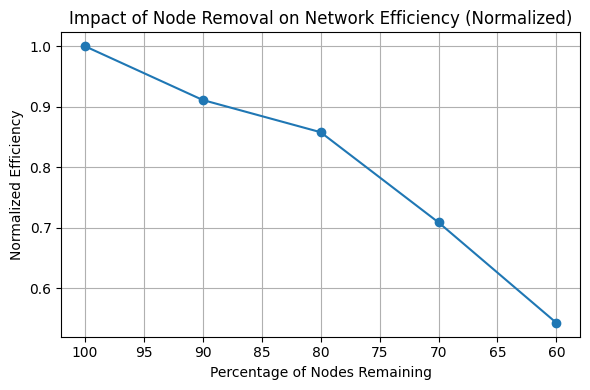

In [15]:
plot_efficiency_results_from_batch(results_random.iloc[1])

In [16]:
compute_avg_runtime_by_num_nodes(results_random)

num_nodes  avg_runtime_removal_seconds  total_runtime_removal_seconds
0         10                       0.3388                          1.694
1         15                       0.3674                          1.837
2         20                       1.5932                          7.966

Node Removed  Time Elapsed (s)
0           419            0.0313
1           418            0.0278
2           327            0.0089
3           301            0.0068

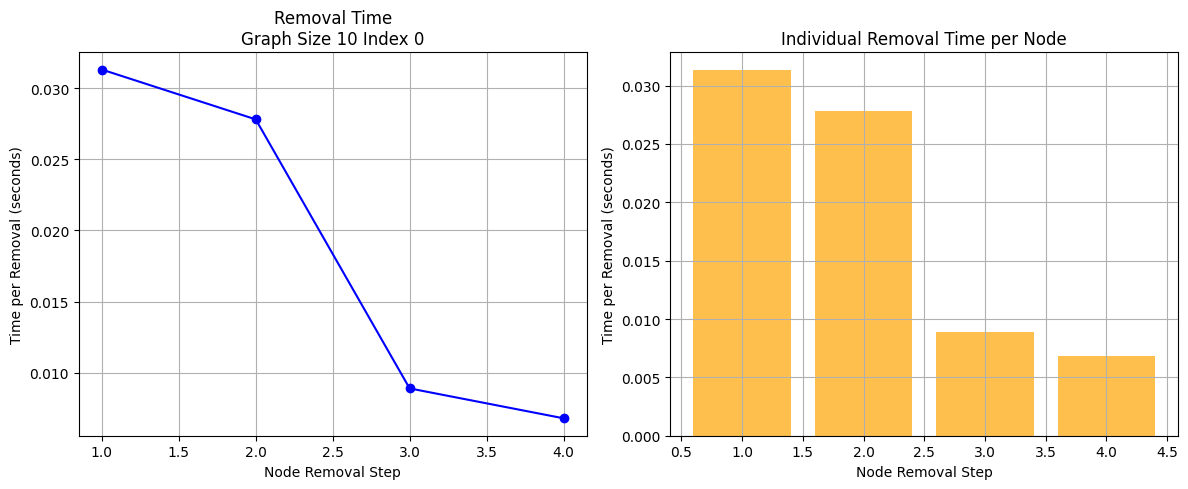

In [17]:
plot_removal_time_vs_steps(results_random.iloc[0])

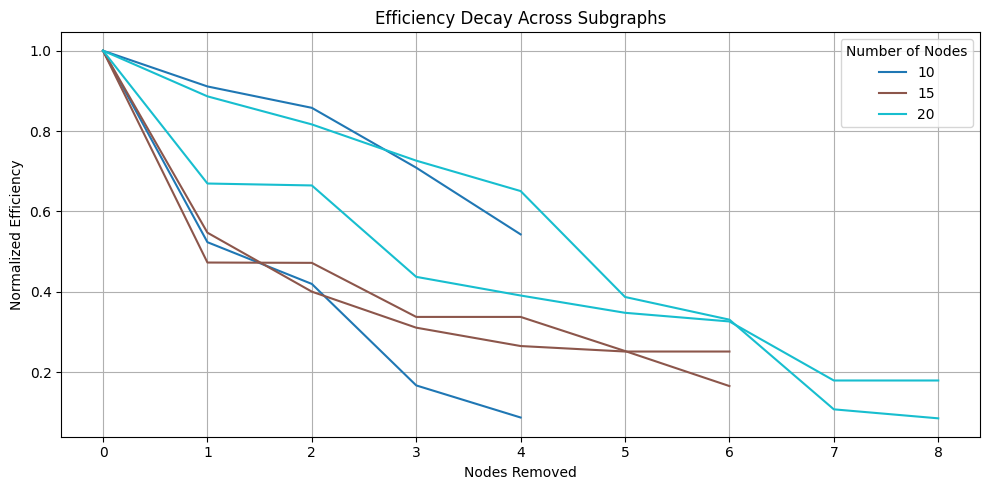

In [18]:
plot_efficiency_decay(results_random, graphs_per_group=2)

### Compare Efficiency Decline in Subgraphs among different countries

In [3]:
import matplotlib.pyplot as plt

def plot_efficiency_by_countries(selected_countries, subgraph_size=10, pct_to_remove=50, method='random'):
    """
    Run node removal efficiency simulations and plot results
    for the given countries and subgraph size.

    Layout:
    - Top row: combined plot with all selected countries
    - Bottom row: one subplot per country (all same size, arranged horizontally)
    """

    # Build sp_func per country
    sp_func_belgium = make_sp_func(attributes_belgium, get_all_GTC_v4, P_space_v4)
    sp_func_netherlands = make_sp_func(attributes_netherlands, get_all_GTC_v4, P_space_v4)
    sp_func_ireland = make_sp_func(attributes_ireland, get_all_GTC_v4, P_space_v4)

    # Configs
    country_configs = {
        "Belgium": {
            "subgraphs": subgraphs_belgium[subgraph_size],
            "color": "black",
            "sp_func": sp_func_belgium
        },
        "Netherlands": {
            "subgraphs": subgraphs_netherlands[subgraph_size],
            "color": "blue",
            "sp_func": sp_func_netherlands
        },
        "Ireland": {
            "subgraphs": subgraphs_ireland[subgraph_size],
            "color": "orange",
            "sp_func": sp_func_ireland
        }
    }

    # ------------------------------------------------
    # Compute once and store results
    # ------------------------------------------------
    results = {}
    for country in selected_countries:
        if country not in country_configs:
            print(f"Warning: {country} not recognized, skipping.")
            continue
        config = country_configs[country]
        country_curves = []
        for L_graph in config["subgraphs"]:
            original_efficiency, efficiencies, num_removed, removed_nodes, removal_times = \
                simulate_fixed_node_removal_efficiency(
                    L_graph=L_graph,
                    sp_func=config["sp_func"],
                    pct_to_remove=pct_to_remove,
                    method=method,
                    seed=42,
                    verbose=False
                )
            country_curves.append((num_removed, efficiencies))
        results[country] = country_curves

    # ------------------------------------------------
    # Plot: combined (top) + country-wise (bottom row)
    # ------------------------------------------------
    fig = plt.figure(figsize=(6*len(selected_countries), 8))
    gs = fig.add_gridspec(2, max(len(selected_countries), 1), height_ratios=[1, 1.2])

    # Combined plot
    ax_combined = fig.add_subplot(gs[0, :])
    for country, curves in results.items():
        config = country_configs[country]
        for idx, (num_removed, efficiencies) in enumerate(curves):
            ax_combined.plot(
                num_removed, efficiencies,
                color=config["color"], alpha=0.6,
                label=country if idx == 0 else ""
            )
    ax_combined.set_title(f"Combined: Node Removal Efficiency (Subgraph size {subgraph_size})")
    ax_combined.set_xlabel("Percentage of Nodes Removed")
    ax_combined.set_ylabel("Efficiency")
    ax_combined.legend()
    ax_combined.grid(True)
    ax_combined.invert_xaxis()

    # Country-wise plots (same row, equal size)
    for j, country in enumerate(results.keys()):
        ax = fig.add_subplot(gs[1, j])
        config = country_configs[country]
        for num_removed, efficiencies in results[country]:
            ax.plot(num_removed, efficiencies, color=config["color"], alpha=0.6)
        ax.set_title(f"{country}")
        ax.set_xlabel("Percentage of Nodes Removed")
        ax.set_ylabel("Efficiency")
        ax.grid(True)
        ax.invert_xaxis()

    plt.tight_layout()
    plt.show()


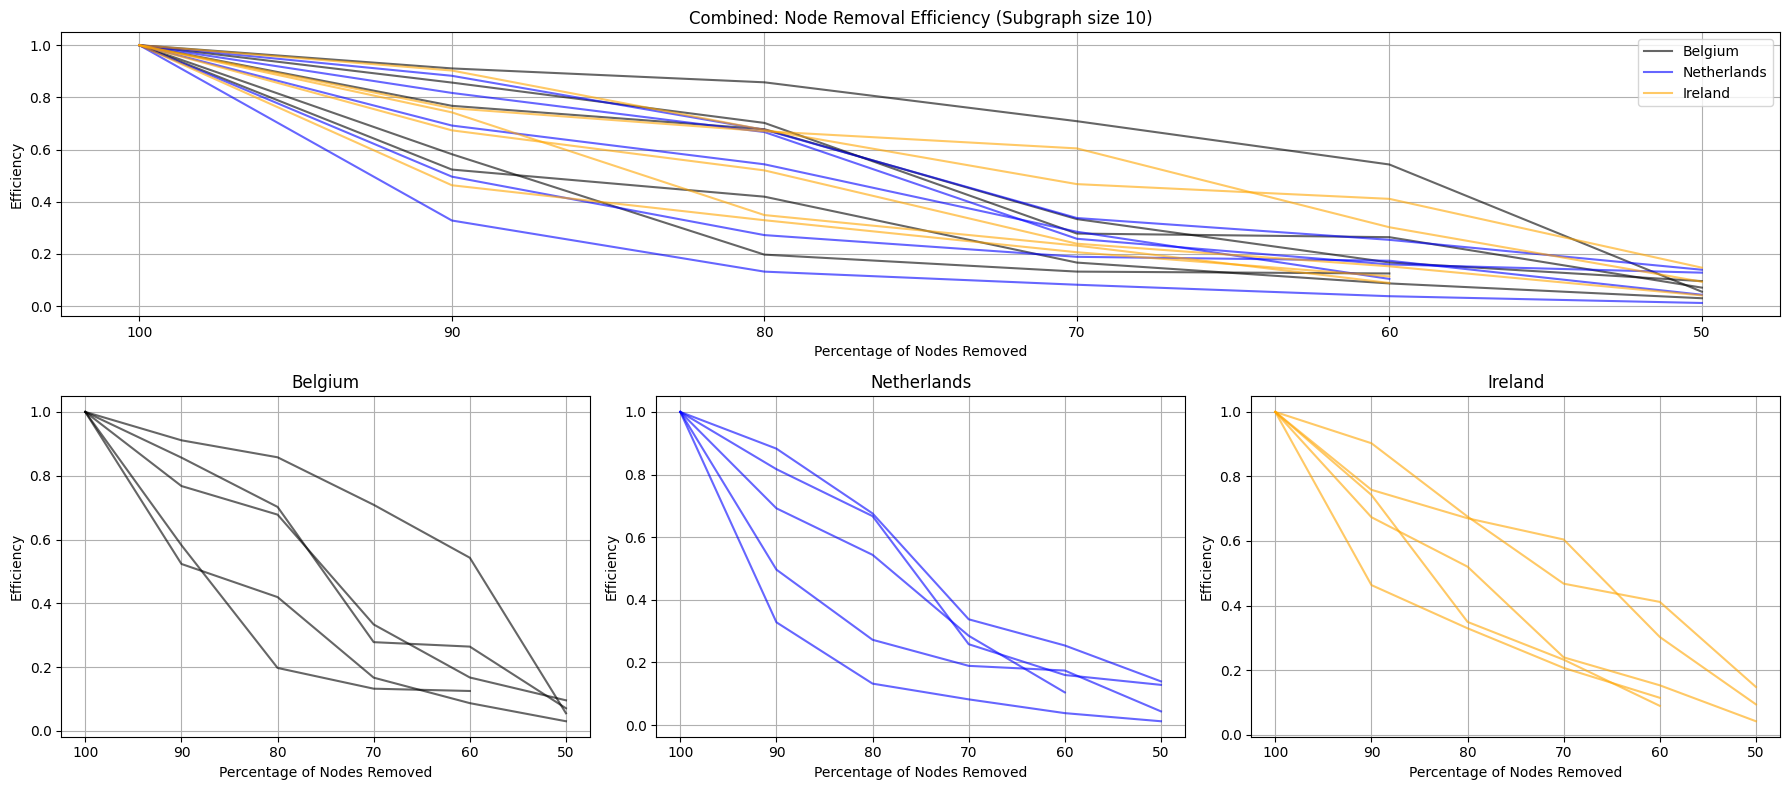

In [4]:
plot_efficiency_by_countries(["Belgium", "Netherlands", "Ireland"], subgraph_size=10)

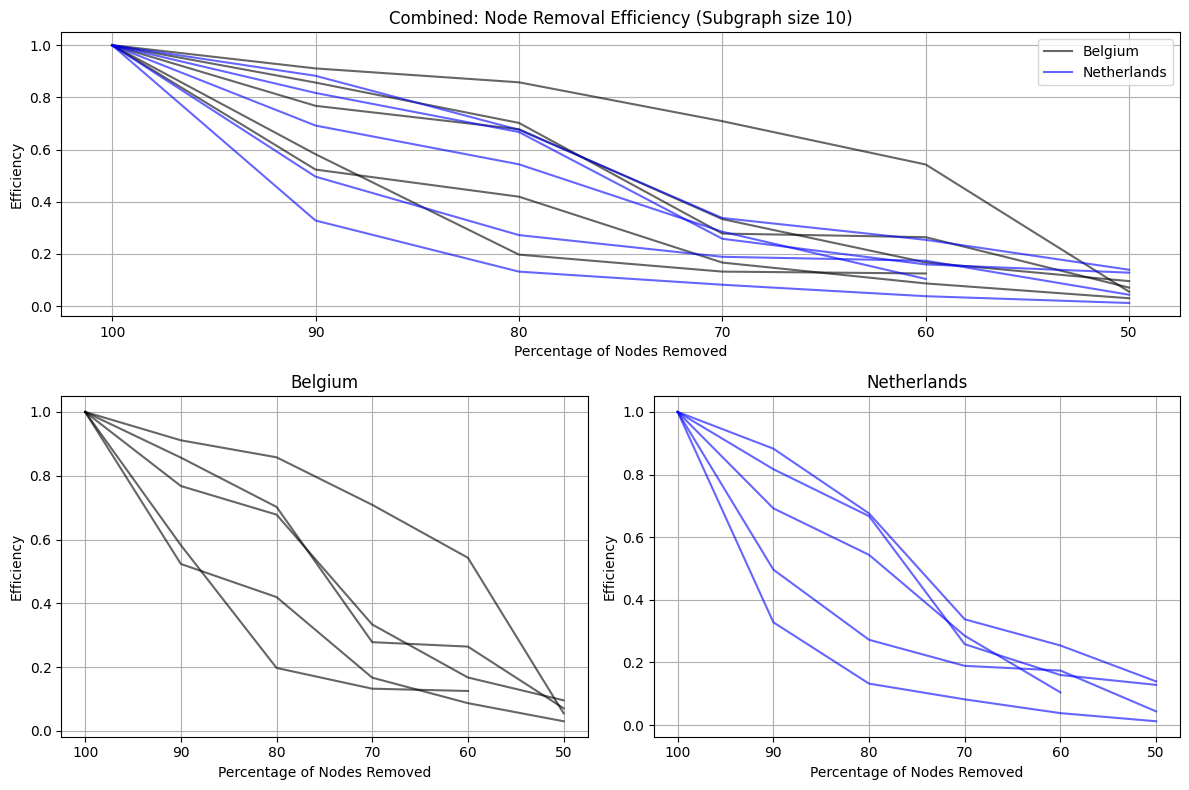

In [5]:
plot_efficiency_by_countries(["Belgium","Netherlands"], subgraph_size=10, pct_to_remove=50, method="random")

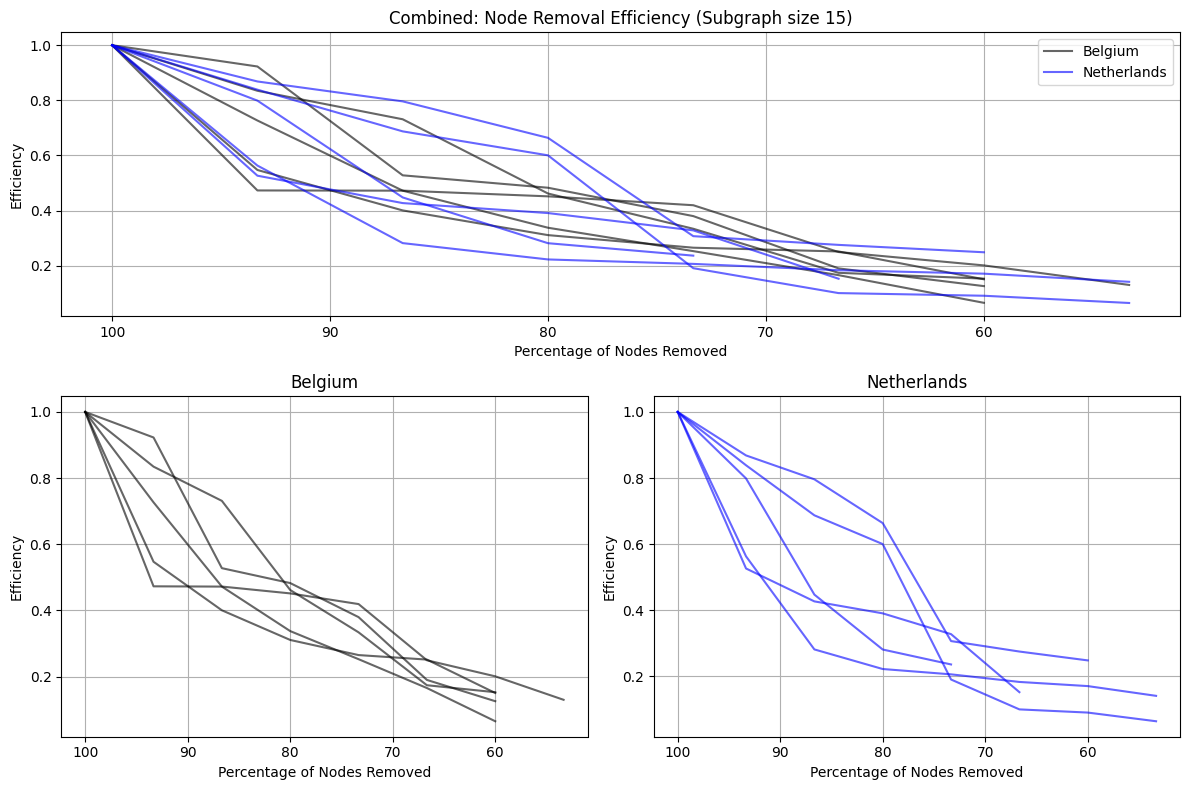

In [6]:
plot_efficiency_by_countries(["Belgium","Netherlands"], subgraph_size=15, pct_to_remove=50, method="random")

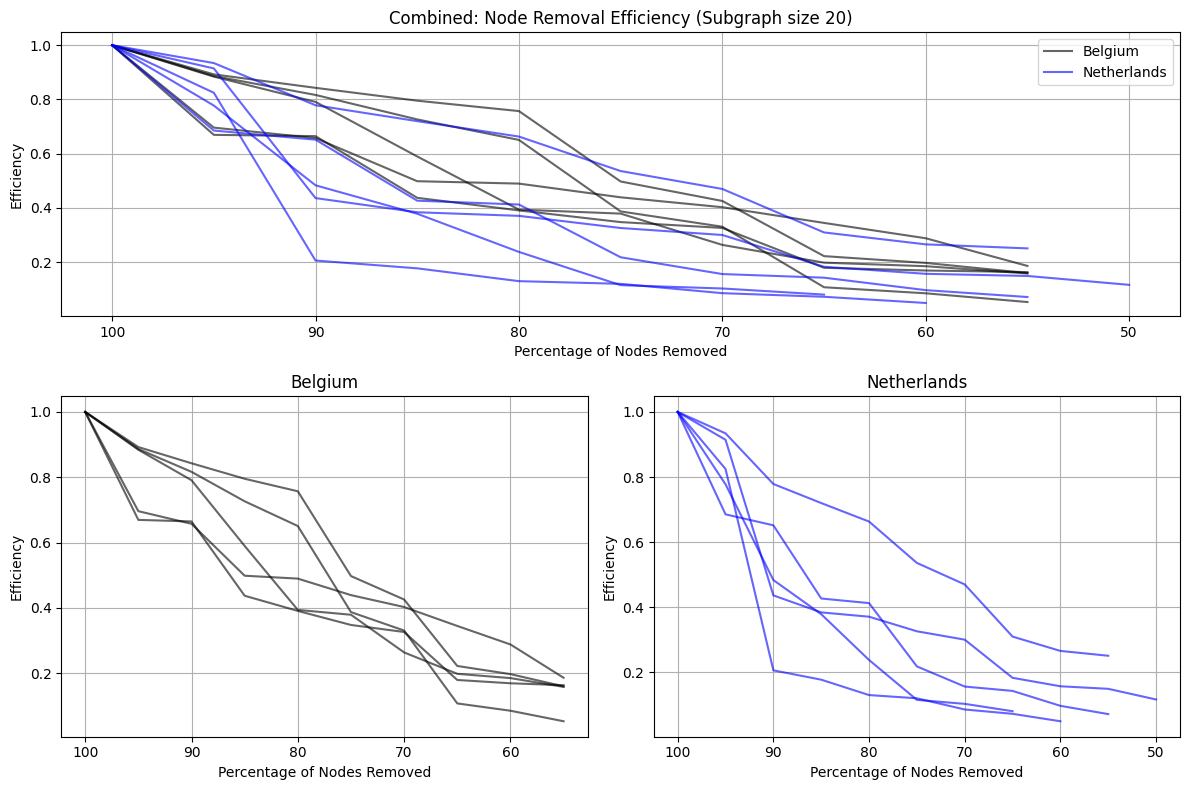

In [7]:
plot_efficiency_by_countries(["Belgium","Netherlands"], subgraph_size=20, pct_to_remove=50, method="random")

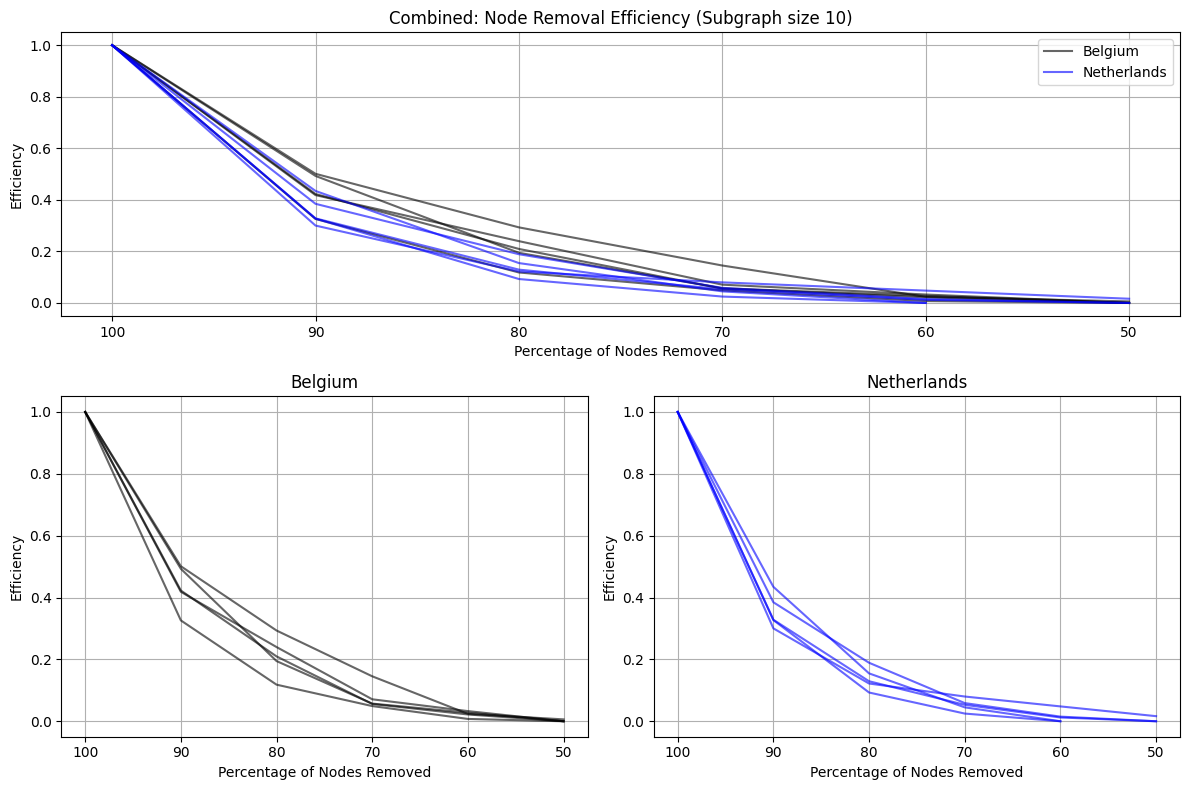

In [8]:
plot_efficiency_by_countries(["Belgium","Netherlands"], subgraph_size=10, pct_to_remove=50, method="targeted")

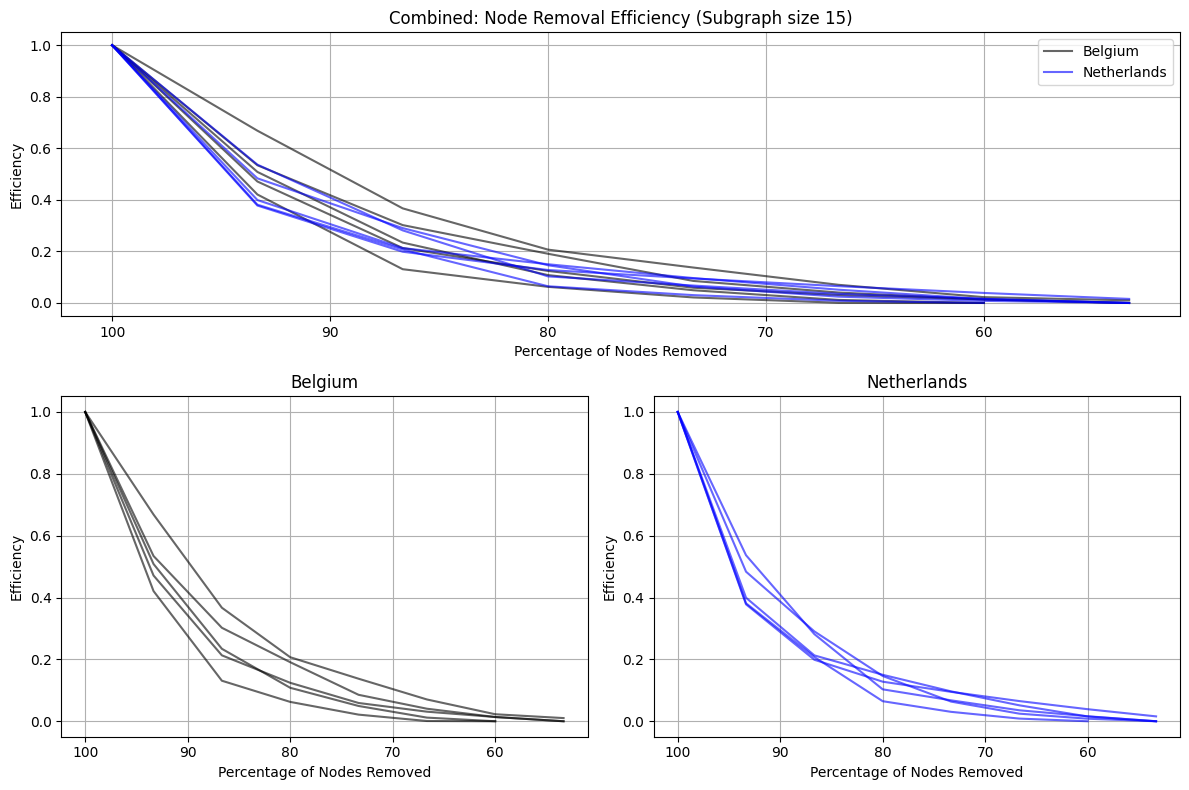

In [9]:
plot_efficiency_by_countries(["Belgium","Netherlands"], subgraph_size=15, pct_to_remove=50, method="targeted")

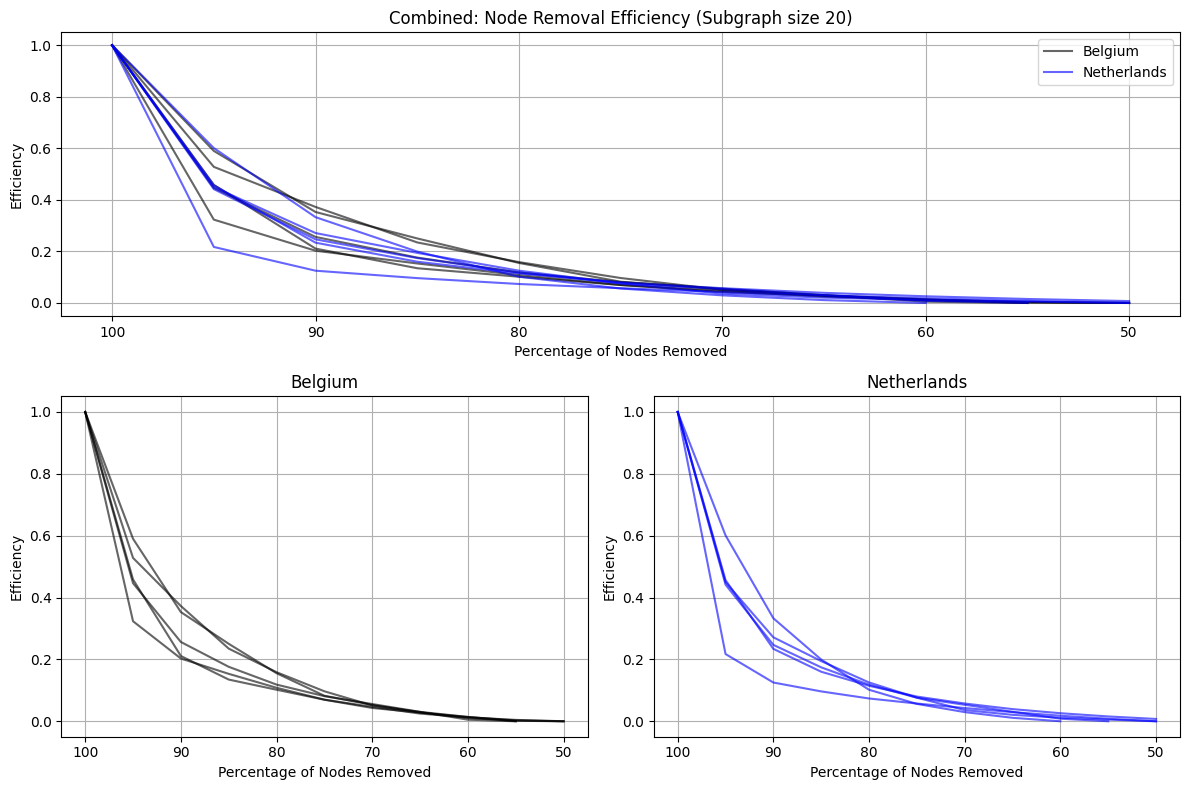

In [10]:
plot_efficiency_by_countries(["Belgium","Netherlands"], subgraph_size=20, pct_to_remove=50, method="targeted")